# Analysis of the Argentine Job Market (Bumeran)

This project aims to analyze the Argentine job market using data extracted from the website Bumeran.com.ar. Through data analysis, cleaning, and visualization techniques, the goal is to uncover insights about the most common job opportunities, the provinces with the highest activity, and the most in-demand positions across different sectors.


## 🎯 Objectives

- Retrieve and clean a dataset of job postings.
- Classify job titles into relevant categories.
- Visualize the distribution of job offers by province and category.
- Identify the most requested positions in key sectors.

## ❓ Questions answered by this analysis

1. Which areas have the highest demand for labor?
2. Which companies lead the way in posting job offers?
3. Which provinces have the most opportunities?
4. Which profiles are most in demand?
5. How are opportunities distributed by sector and location?


In [56]:
import pandas as pd
from collections import Counter

In [57]:
# DataFrame from 27/06/2025
df = pd.read_csv('bumeran_jobs_general.csv')
df.head()

,Puesto,Empresa,Ubicación,Link
0,Analista de Control de Gestión SSr./ Sr.,ELECTROPELBA SA,"Boulogne, Buenos Aires",https://www.bumeran.com.ar/empleos/analista-de...
1,Supervisor de Producción para Panificadora - Z...,Confidencial,"Florida Oeste, Buenos Aires",https://www.bumeran.com.ar/empleos/supervisor-...
2,ADMINISTRATIVO CONTABLE SENIOR,Actualizado hace 3 horas,"Córdoba, Córdoba",https://www.bumeran.com.ar/empleos/administrat...
3,STORE MANAGER PARA SHOPPING,Actualizado hace 2 horas,"Capital Federal, Buenos Aires",https://www.bumeran.com.ar/empleos/store-manag...
4,"vendedor call center , telemarketer concesiona...",Actualizado hace 8 horas,"Capital Federal, Buenos Aires",https://www.bumeran.com.ar/empleos/vendedor-ca...


In [58]:
# Analiesis of the dataset
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13800 entries, 0 to 13799
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Puesto     13798 non-null  object
 1   Empresa    13800 non-null  object
 2   Ubicación  13781 non-null  object
 3   Link       13800 non-null  object
dtypes: object(4)
memory usage: 431.4+ KB


,Puesto,Empresa,Ubicación,Link
count,13798,13800,13781,13800
unique,10207,1574,422,13767
top,Analista Contable,Actualizado hace más de 15 días,"Capital Federal, Buenos Aires",https://www.bumeran.com.ar/empleos/telemarkete...
freq,56,3551,5393,2


## 1. Data Cleaning and Preparation

This section cleans the raw data, removing duplicates, null values, and unwanted characters. Job titles are also normalized to facilitate later analysis.


In [59]:
# Delete duplicates
print(f"Before to delete duplicates: {df.shape}")
df.drop_duplicates(subset=["Link"], inplace=True)
print(f"after to delete duplicates: {df.shape}")

Before to delete duplicates: (13800, 4)
after to delete duplicates: (13767, 4)


In [60]:
# value null
df.isnull().sum()

Puesto        2
Empresa       0
Ubicación    19
Link          0
dtype: int64

In [61]:
# Normalize the all text
df['Puesto'] = df['Puesto'].str.lower().str.strip()
df['Empresa'] = df['Empresa'].str.lower().str.strip()
df['Ubicación'] = df['Ubicación'].str.lower().str.strip()

In [62]:
# Delete null values of jobs
df = df.dropna(subset=['Puesto'])
df.isnull().sum()

Puesto        0
Empresa       0
Ubicación    19
Link          0
dtype: int64

In [63]:
# Replace the null values of "Ubicacion" with "not specified location"
df['Ubicación'] = df['Ubicación'].fillna('not specified location')
df.isnull().sum()

Puesto       0
Empresa      0
Ubicación    0
Link         0
dtype: int64

In [64]:
# Visualize all the names of the jobs and save them in a CSV file
puestos_unicos = pd.DataFrame({'Puesto': sorted(df['Puesto'].unique())})
puestos_unicos.to_csv("puestos_unicos.csv", index=False)


In [65]:
# I have to fix grammar mistakes, coming from use spanish language
# i'll use unidecode to fix thigs like accents
%pip install unidecode
import unidecode

def clean_text(text):
    if pd.isnull(text):
        return text
    text = text.lower()
    text = unidecode.unidecode(text) # remove accents and special characters
    text = text.strip()
    return text 

df['Puesto_limpio'] = df['Puesto'].apply(clean_text)   

Note: you may need to restart the kernel to use updated packages.


In [66]:
import re
# Remove seniority terms from job titles
def remove_seniority(text):
    if pd.isnull(text):
        return text
    text = re.sub(r'\b(junior|jr|semi senior|semi-senior|ssr|sr|senior|sr\.)\b', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

df['Puesto_limpio'] = df['Puesto_limpio'].apply(remove_seniority)

In [67]:
# Delete duplicates names from "Puesto_limpio"
puestos_unicos = sorted(df['Puesto_limpio'].unique())
for puesto in puestos_unicos:
    print(puesto)
Puesto_limpio = pd.DataFrame({'Puesto_limpio': puestos_unicos}) 
Puesto_limpio.to_csv("puestos_limpios.csv", index=False)

!!sumate a nuestro grupo de ventas!! minima experiencia en ventas de intangibles
!buscamos martilleros publicos y corredores inmobiliarios graduados!
!buscamos vendedores para concesionario oficial renault en puerto madero!
!estamos buscando star assistant con adn comercial!
!oportunidad laboral para vendedoras online en san martin!
!unete a nuestro equipo de ventas digitales en argentina!
(caba) sub-encargado de tienda abasto shopping
- contable (experiencia en seguros)
- para mejora de procesos - con experiencia en energia, mineria, oil&gas
. account payabale analyst (eventual) - req193572
. backend developer
. backend java - latam (remoto)
. de administracion y contabilidad
. de contabilidad e impuestos
. team lead engineer (java)
. vendor risk analyst
.net engineer (remoto - latam)
1178cc sales executive b2b latam - food industry
1183cc consultor/a payroll - belgrano
1211cc responsable de intendencia y mantenimiento - planta productiva - gba sur
1216cc jefe administrativo contable 

## 2. Job Classification

Job titles are diverse, so they are grouped into categories to enable proper analysis. A custom function is used to assign each job to a general category.


In [68]:
import re

def categorizar_puesto(texto):
    texto = str(texto).lower()
    if any(re.search(rf'\b{kw}\b', puesto) for kw in [
        'developer', 'desarrollador', 'programador', 'devops', 'qa', 'backend',
        'frontend', 'fullstack', 'sysadmin', 'soporte técnico', 'infraestructura',
        'software', 'scrum', 'erp', 'sap', 'sistemas', 'tecnología', 'it',
        'net', 'java', 'python', 'tester', 'c#', 'react', 'angular'
    ]):
        return 'IT / Tecnología'
    elif any(kw in texto for kw in ['data', 'bi', 'analista de datos', 'business intelligence', 'inteligencia de negocios']):
        return 'Data / Analytics'
    elif any(kw in texto for kw in ['ventas', 'ejecutivo comercial', 'account manager', 'comercial', 'vendedor']):
        return 'Ventas / Comercial'
    elif any(kw in texto for kw in ['ejecutivo de cuentas', 'preventista', 'sdr', 'sales development', 'promotor']):
        return 'Ventas Especializadas'
    elif any(kw in texto for kw in ['administrativo', 'administracion', 'back office', 'asistente administrativo', 'secretaria']):
        return 'Administración'
    elif any(kw in texto for kw in ['marketing', 'publicidad', 'community manager', 'seo', 'contenidos']):
        return 'Marketing / Publicidad'
    elif any(kw in texto for kw in ['rrhh', 'recursos humanos', 'talent', 'seleccion']):
        return 'Recursos Humanos'
    elif any(kw in texto for kw in ['call center', 'atencion cliente', 'customer support', 'servicio al cliente', 'telemarketer', 'atencion al publico']):
        return 'Atención al Cliente / Televenta'
    elif any(kw in texto for kw in ['logistica', 'transporte', 'supply chain', 'almacen', 'distribucion', 'chofer']):
        return 'Logística / Operaciones'
    elif any(kw in texto for kw in ['finanzas', 'contable', 'impuestos', 'cobranzas', 'tesoreria', 'facturacion', 'cuentas a pagar', 'contador', 'cuentas corrientes']):
        return 'Finanzas / Contabilidad'
    elif any(kw in texto for kw in ['qa', 'tester', 'testing', 'quality assurance']):
        return 'QA / Testing'
    elif any(kw in texto for kw in ['produccion', 'fabricacion', 'maestranza', 'jefe de planta', 'supervisor de produccion']):
        return 'Producción / Planta'
    elif any(kw in texto for kw in ['recepcionista']):
        return 'Recepción / Atención'
    elif any(kw in texto for kw in ['comprador', 'compras', 'comercio exterior']):
        return 'Compras / Comercio Exterior'
    elif any(kw in texto for kw in ['cocina', 'ayudante de cocina', 'chef', 'cocinero']):
        return 'Cocina / Gastronomía'
    elif any(kw in texto for kw in ['diseñador', 'disenador', 'grafico']):
        return 'Diseño / Creatividad'
    elif any(kw in texto for kw in ['abogado', 'abogada']):
        return 'Legal'
    elif any(kw in texto for kw in ['limpieza']):
        return 'Limpieza / Servicios generales'
    elif any(kw in texto for kw in ['jefe de obra', 'obra', 'construccion', 'carpintero', 'tornero']):
        return 'Construcción / Oficios'
    elif any(kw in texto for kw in ['project manager', 'proyectos', 'planeamiento', 'gestion', 'control de gestion']):
        return 'Gestión / Planeamiento'
    elif any(kw in texto for kw in ['tecnico', 'mantenimiento', 'mecanico', 'electricista', 'electromecanico', 'oficial']):
        return 'Soporte Técnico / Mantenimiento'
    elif any(kw in texto for kw in ['farmaceutico']):
        return 'Salud / Farmacia'
    elif any(kw in texto for kw in ['instructor', 'entrenador']):
        return 'Educación / Entrenamiento'
    elif any(kw in texto for kw in ['procesos', 'control de calidad', 'calidad', 'regulatorio']):
        return 'Procesos / Mejora Continua'
    elif any(kw in texto for kw in ['gerente de operaciones', 'jefe de operaciones', 'supervisor de operaciones', 'encargado', 'gerente general', 'jefe de area']):
        return 'Operaciones / Dirección'
    elif any(kw in texto for kw in ['liquidador', 'payroll']):
        return 'Recursos Humanos / Payroll'
    elif any(kw in texto for kw in ['farmacia', 'farmaceutico']):
        return 'Farmacia / Salud'
    elif any(kw in texto for kw in ['e-commerce', 'comercio electronico']):
        return 'E-commerce / Digital'
    elif any(kw in texto for kw in ['seguros', 'sales executive', 'telesales', 'ejecutivo/a de cuentas']):
        return 'Ventas Especializadas / Seguros'
    elif any(kw in texto for kw in ['administrativa', 'empleada administrativa', 'asistente administrativa']):
        return 'Administración / Soporte Interno'
    elif any(kw in texto for kw in ['ingeniero', 'ingenieria']):
        return 'Ingeniería'
    elif any(kw in texto for kw in ['carga y descarga']):
        return 'Logística / Carga'
    elif any(kw in texto for kw in ['taller', 'manufactura']):
        return 'Producción / Taller'
    elif any(kw in texto for kw in ['trainee', 'programa trainees']):
        return 'Jóvenes Profesionales / Trainees'
    elif any(kw in texto for kw in ['seguridad', 'higiene', 'hse']):
        return 'Seguridad / Higiene / Medioambiente'
    elif any(kw in texto for kw in ['producto', 'e-commerce', 'funcional']):
        return 'Producto / UX / Negocio Digital'
    elif any(kw in texto for kw in ['jefe', 'gerente', 'coordinador', 'responsable']):
        return 'Jefatura / Coordinación General'
    elif any(kw in texto for kw in ['operador', 'call center', 'televentas']):
        return 'Operadores / Call Center'
    elif any(kw in texto for kw in ['auxiliar', 'ayudante', 'soporte']):
        return 'Auxiliares / Apoyo General'
    else:
        return 'Otros / General'


In [69]:
df['Categoria'] = df['Puesto_limpio'].apply(categorizar_puesto)

In [70]:
# Create a new column that groups IT subcategories
def agrupar_categoria_it(categoria):
    if categoria in [
        'Producto / UX / Negocio Digital',
        'Data / Analytics',
        'QA / Testing',
        'E-commerce / Digital',
        'Ingeniería',
        'Soporte Técnico / Mantenimiento'
    ]:
        return 'IT / Tecnología'
    return categoria

df['Categoria_grupo'] = df['Categoria'].apply(agrupar_categoria_it)


In [71]:
df_it = df[df['Categoria_grupo'] == 'IT / Tecnología']

In [72]:
# Apply fuction to the whole DataFrame
df['Categoria'] = df['Puesto_limpio'].apply(categorizar_puesto)
print(df['Categoria'].value_counts())

Categoria
Otros / General                        3067
Ventas / Comercial                     2812
Soporte Técnico / Mantenimiento        1256
Administración                          919
Finanzas / Contabilidad                 842
Data / Analytics                        456
Jefatura / Coordinación General         404
Logística / Operaciones                 392
Producción / Planta                     352
Compras / Comercio Exterior             289
Recursos Humanos                        235
Marketing / Publicidad                  217
Operaciones / Dirección                 205
Construcción / Oficios                  200
Procesos / Mejora Continua              195
Gestión / Planeamiento                  167
Cocina / Gastronomía                    145
Diseño / Creatividad                    130
Auxiliares / Apoyo General              128
Operadores / Call Center                115
Recepción / Atención                    114
Producto / UX / Negocio Digital         106
Administración / Sopor

## 3. Visualization and Analysis by Category and Location

An analysis of how job offers are distributed across different provinces and job categories.


Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'Distribution of Job Offers by Category'}, ylabel='Categoria'>

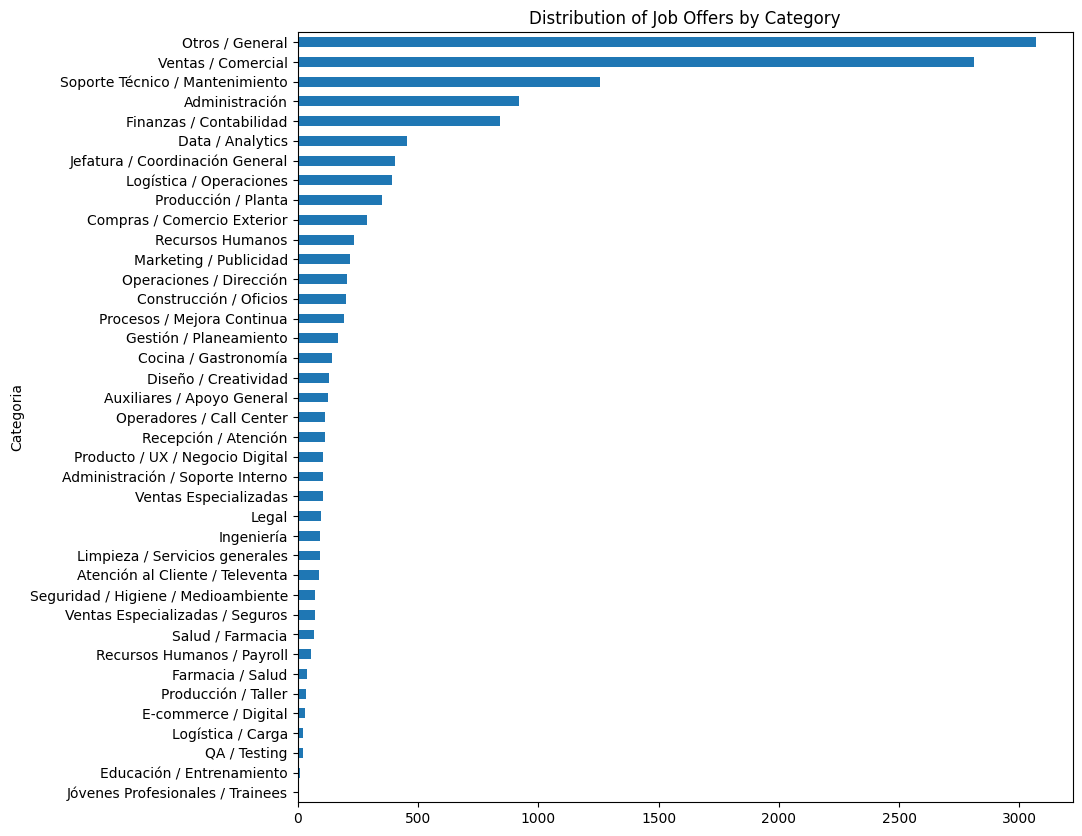

In [73]:
%pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
df['Categoria'].value_counts().sort_values().plot(kind='barh', title = 'Distribution of Job Offers by Category')

The top 3 job categories by number of offers are: "Otros / General", "Ventas / Comercial", and "Soporte Técnico / Mantenimiento".

Previously used to explore the most frequently repeated job titles within the "Otros / General" category:
df[df['Categoria'] == 'Otros / General']['Puesto_limpio'].value_counts().head(50)

Let's clean the incorrect company names in the "Empresa" column.

In [74]:
df['Empresa'].value_counts().head(20)

Empresa
actualizado hace más de 15 días    3545
actualizado ayer                    967
actualizado hace 2 días             741
actualizado hace 7 días             415
actualizado hace 8 días             393
actualizado hace 6 días             373
confidencial                        324
actualizado hace 12 días            255
actualizado hace 14 días            251
actualizado hace 13 días            249
actualizado hace 6 horas            213
actualizado hace 7 horas            201
actualizado hace 5 horas            171
actualizado hace 4 horas            144
actualizado hace 8 horas            123
actualizado hace 2 horas            114
actualizado hace 3 horas            109
b&b consultores                      87
actualizado hace 1 hora              87
actualizado hace 3 días              80
Name: count, dtype: int64

In [75]:
# Filter with .str.contains() y replace
df['Empresa'] = df['Empresa'].apply(lambda x: 'Sin Informacion' if isinstance(x, str) and x.lower().startswith('actualizado') else x )
# Give the title's format to the company names and location
df['Empresa'] = df['Empresa'].str.strip().str.title()
df["Ubicación"] = df["Ubicación"].str.strip().str.title()

In [76]:
df['Empresa'].value_counts().head(20)

Empresa
Sin Informacion                                               8901
Confidencial                                                   324
B&B Consultores                                                 87
Aliantec                                                        80
National Brokers                                                61
Mj Consultores                                                  59
Car One                                                         56
Slc                                                             54
Bayton                                                          53
Manpower                                                        52
Sancor Salud                                                    47
Grupo Gestión                                                   43
Emergencias  | Grupo Ihsa International Health Services Sa      43
Adecco - Permanent Talent                                       40
Rh Talentum                                           

In [77]:

df["Ubicación"].value_counts().head(50)

Ubicación
Capital Federal, Buenos Aires      5383
Córdoba, Córdoba                    395
Rosario, Santa Fe                   352
Vicente López, Buenos Aires         336
Buenos Aires, Buenos Aires          333
Pilar, Buenos Aires                 315
San Martin, Buenos Aires            205
Tigre, Buenos Aires                 186
San Isidro, Buenos Aires            184
Martínez, Buenos Aires              183
Neuquén, Neuquén                    178
Avellaneda, Buenos Aires            170
Munro, Buenos Aires                 139
La Plata, Buenos Aires              126
Tortuguitas, Buenos Aires           105
Quilmes, Buenos Aires               103
Ezeiza, Buenos Aires                103
San Justo, Buenos Aires             102
Olivos, Buenos Aires                102
Mar Del Plata, Buenos Aires          98
General Pacheco, Buenos Aires        93
Moreno, Buenos Aires                 91
Mendoza, Mendoza                     86
Ituzaingó, Buenos Aires              86
Berazategui, Buenos Aires     

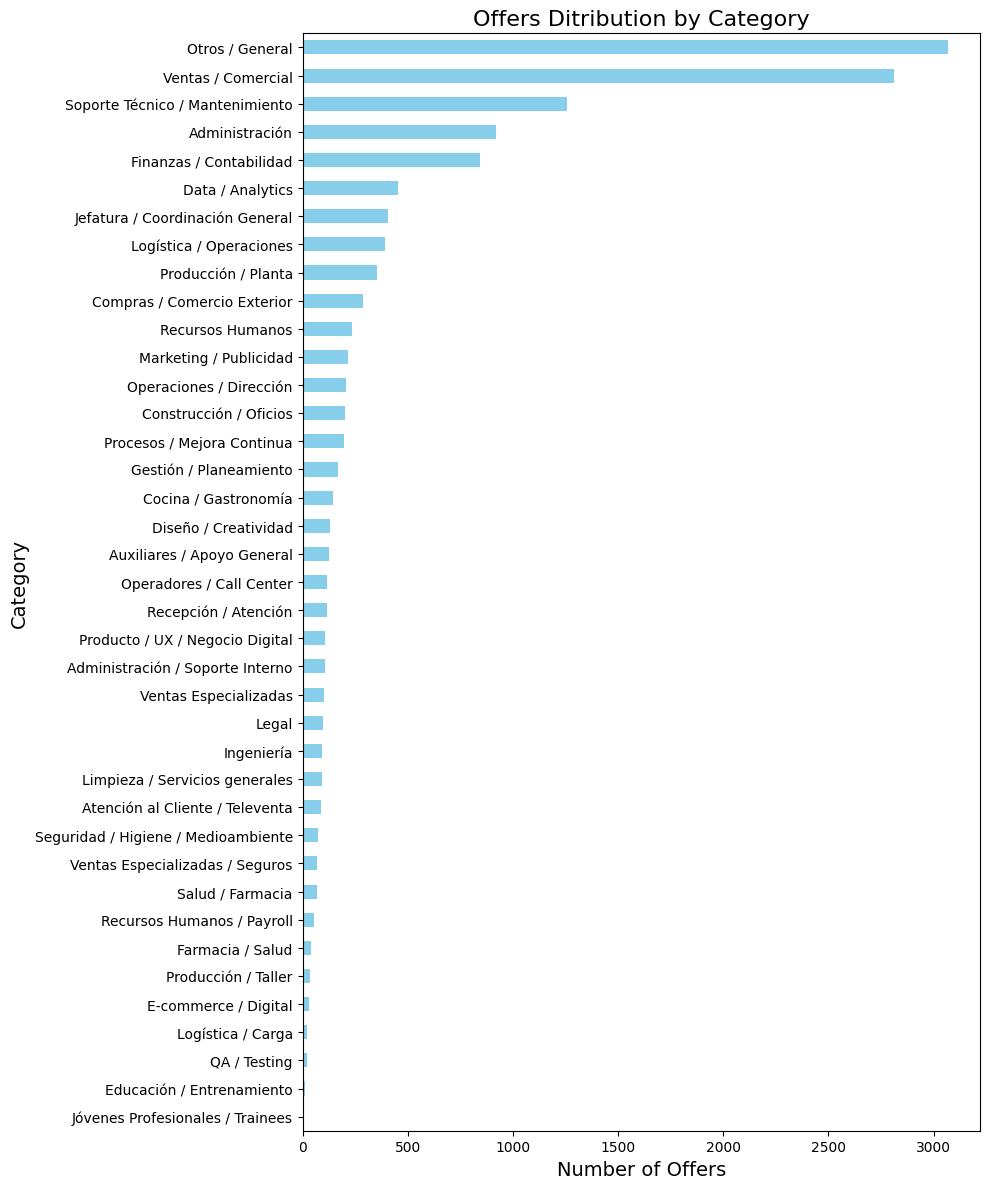

In [78]:
# Distribution of jobs by category
import matplotlib.pyplot as plt

plt.figure(figsize=(10,12))
df['Categoria'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title('Offers Ditribution by Category', fontsize=16)
plt.xlabel('Number of Offers', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.tight_layout()
plt.savefig('offers_distribution_by_category.png')
plt.show()

The top 3 categories by number of job postings are clearly "Otros / General", "Ventas / Comercial", and "Soporte Técnico / Mantenimiento".

Empresa
Sin Informacion                                               8901
Confidencial                                                   324
B&B Consultores                                                 87
Aliantec                                                        80
National Brokers                                                61
Mj Consultores                                                  59
Car One                                                         56
Slc                                                             54
Bayton                                                          53
Manpower                                                        52
Sancor Salud                                                    47
Grupo Gestión                                                   43
Emergencias  | Grupo Ihsa International Health Services Sa      43
Adecco - Permanent Talent                                       40
Rh Talentum                                           

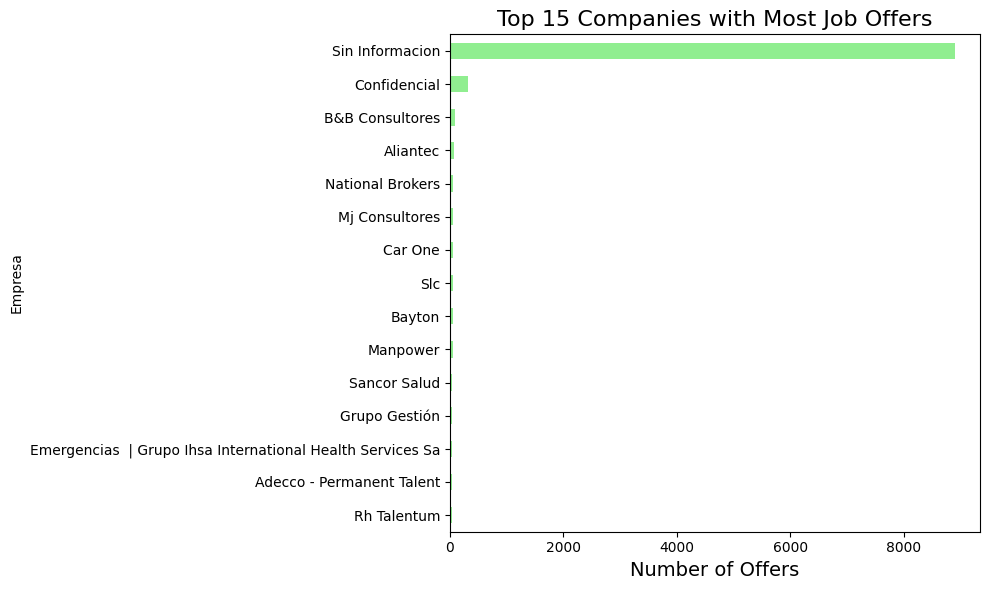

In [79]:
# Top 15 of the companies with the most job offers
top_empresas = df['Empresa'].value_counts().head(15)
print(top_empresas)

plt.figure(figsize=(10,6))
top_empresas.plot(kind='barh', color='lightgreen')
plt.title('Top 15 Companies with Most Job Offers', fontsize=16)
plt.xlabel('Number of Offers', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_15_companies_with_most_job_offers.png')
plt.show()

The majority of job postings are labeled as "Sin Información" (No Information). The next most frequent employers are "Confidencial" and "B&B Consultores".

In [80]:
# Create a new column for the province from the location
df['Provincia'] = df['Ubicación'].apply(lambda x : x.split(',')[-1].strip() if isinstance(x, str) and ',' in x else 'Sin informacion')
df['Provincia'].value_counts().head(20)

Provincia
Buenos Aires        11670
Santa Fe              568
Córdoba               503
Neuquén               211
Mendoza               182
Tucumán                79
Salta                  76
Entre Ríos             57
Río Negro              57
Sin informacion        40
San Juan               40
Chubut                 38
Corrientes             36
San Luis               33
Chaco                  26
Tierra Del Fuego       23
Santa Cruz             23
Jujuy                  21
La Pampa               21
Misiones               20
Name: count, dtype: int64

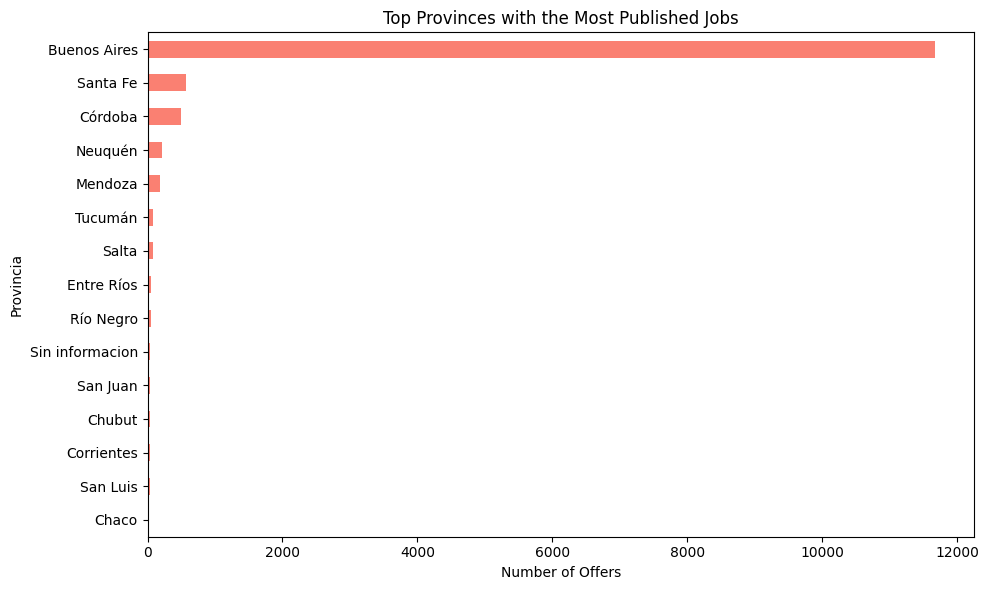

In [81]:
df['Provincia'].value_counts().head(15).plot(kind='barh', figsize=(10,6), color='salmon', title='Top Provinces with the Most Published Jobs')
plt.xlabel('Number of Offers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_provinces_with_most_published_jobs.png')
plt.show()

We can observe that Bumeran's activity is heavily concentrated in Buenos Aires. Therefore, job offer distributions cannot be generalized nationwide based solely on this dataset.

Note: you may need to restart the kernel to use updated packages.


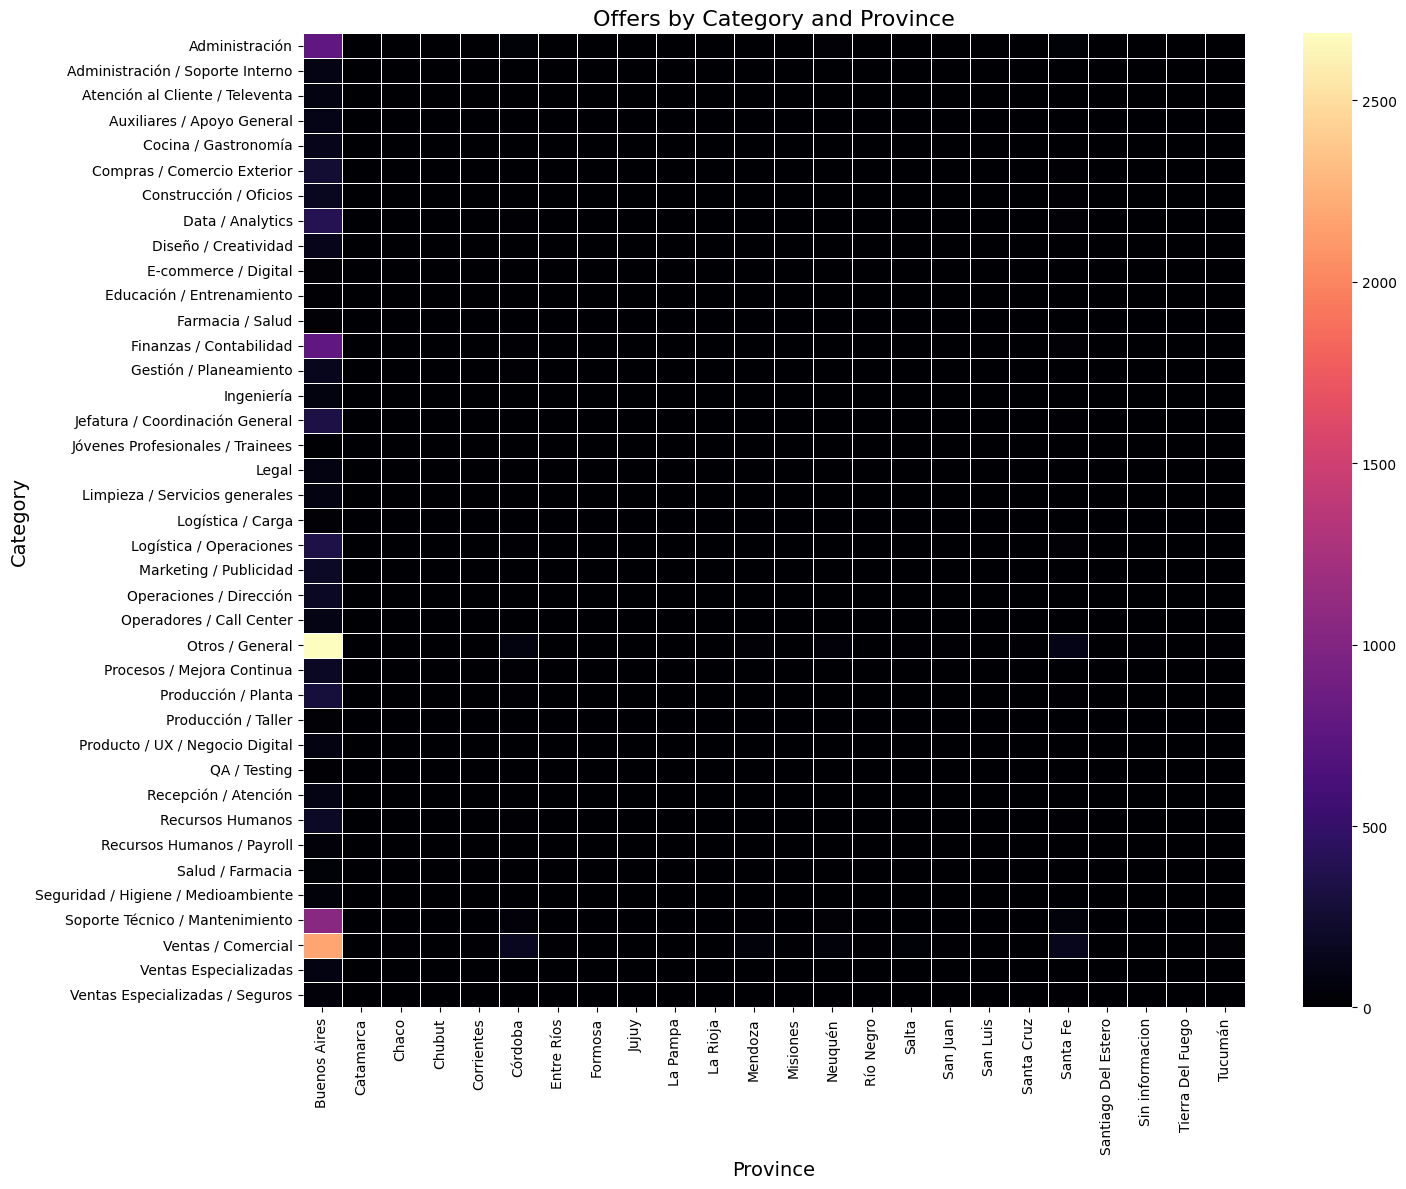

In [82]:
# Heatmap category vs province
%pip install seaborn
import seaborn as sns

pivot = df.pivot_table(index='Categoria', columns='Provincia', aggfunc='size', fill_value=0)

plt.figure(figsize=(15,12))
sns.heatmap(pivot, cmap='magma', linewidths=0.5)
plt.title('Offers by Category and Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.tight_layout()
plt.savefig('offers_by_category_and_province_heatmap.png')
plt.show()

Note: you may need to restart the kernel to use updated packages.


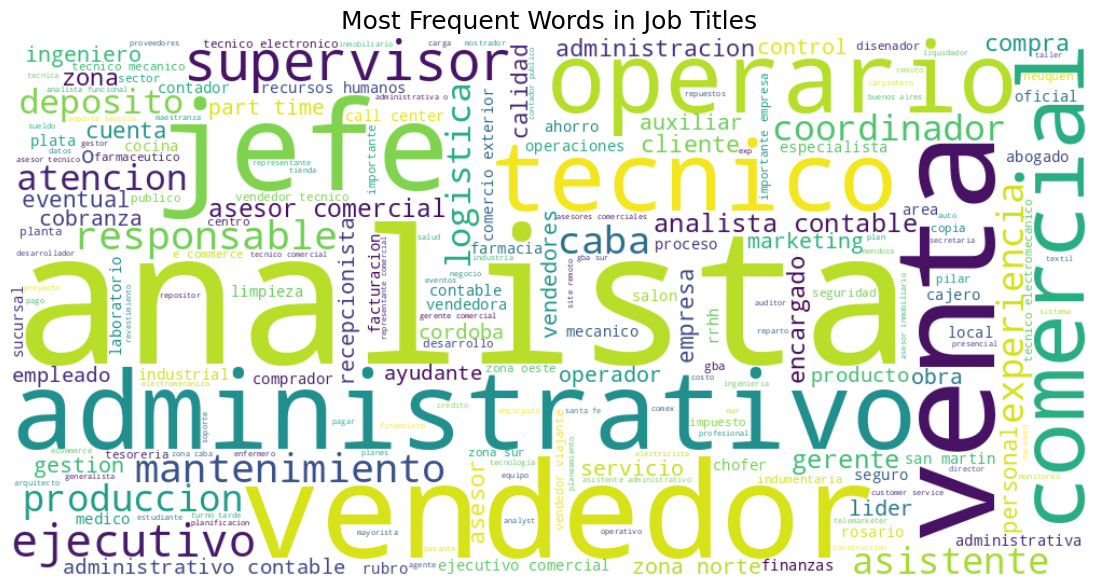

In [83]:
%pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

texto_puestos = ' '.join(df['Puesto_limpio'].dropna())

stopwords_esp = set(STOPWORDS)
stopwords_esp.update(['de', 'la', 'el', 'en', 'y', 'que', 'los', 'las', 'un', 'una', 'con', 'para', 'del', 'al', 'se', 'es', 'como', 'más', 'por', 'su'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=stopwords_esp).generate(texto_puestos)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Job Titles', fontsize=18)
plt.savefig('most_frequent_words_in_job_titles.png')
plt.show()

The most prominent keywords we find in job postings are "Analyst," "Sales," "Manager," and "Salesperson." This coincides with the majority of job postings offered by Bumeran.

In [84]:
# Dinamic table of categories vs province
tabla_cat_prov = df.pivot_table(
    index='Provincia',
    columns='Categoria',
    aggfunc='size',
    fill_value=0
)

In [85]:
tabla_cat_prov.head(10)

Categoria,Administración,Administración / Soporte Interno,Atención al Cliente / Televenta,Auxiliares / Apoyo General,Cocina / Gastronomía,Compras / Comercio Exterior,Construcción / Oficios,Data / Analytics,Diseño / Creatividad,E-commerce / Digital,...,QA / Testing,Recepción / Atención,Recursos Humanos,Recursos Humanos / Payroll,Salud / Farmacia,Seguridad / Higiene / Medioambiente,Soporte Técnico / Mantenimiento,Ventas / Comercial,Ventas Especializadas,Ventas Especializadas / Seguros
Provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,786,99,85,105,134,262,159,391,126,31,...,20,102,193,50,41,60,1055,2180,90,47
Catamarca,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,3,7,0,0
Chaco,1,0,0,0,0,1,0,0,0,0,...,0,0,3,0,0,0,2,14,0,0
Chubut,2,0,0,0,0,0,2,1,0,0,...,0,0,1,2,2,0,8,9,0,0
Corrientes,2,0,0,0,0,2,0,1,1,0,...,0,0,0,0,0,0,2,16,0,0
Córdoba,33,2,2,8,1,5,8,16,1,0,...,1,5,11,0,4,6,48,162,2,3
Entre Ríos,3,0,0,0,0,0,2,0,0,0,...,0,0,9,0,2,0,3,17,0,0
Formosa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
Jujuy,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,10,1,0


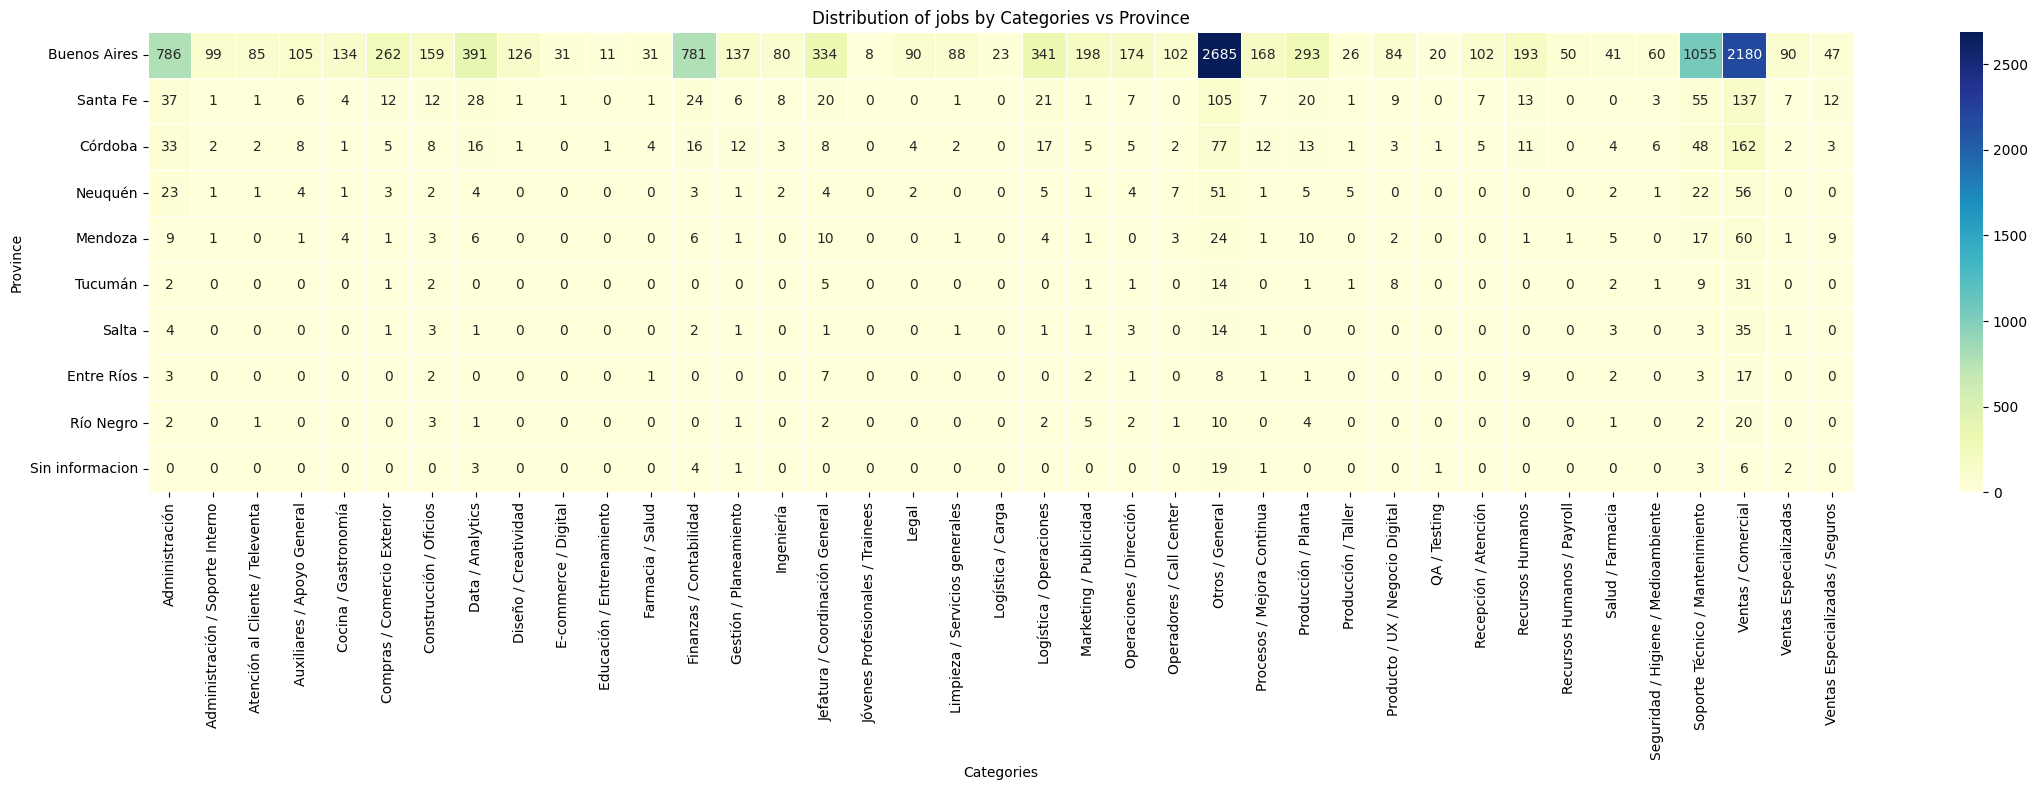

In [86]:
# Heatmap of province vs category
top_provincias = df['Provincia'].value_counts().head(10).index
tabla_top = tabla_cat_prov.loc[top_provincias]

plt.figure(figsize=(23,8))
sns.heatmap(tabla_top, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')
plt.title("Distribution of jobs by Categories vs Province")
plt.ylabel('Province')
plt.xlabel('Categories')
plt.tight_layout()
plt.savefig('distribution_of_jobs_by_categories_vs_province.png')
plt.show()

1. Which categories dominate in each province?

2. Is there any province with a strong presence of Data or IT jobs?

3. Where do Sales or Customer Service jobs prevail?

4. Which province has the greatest job diversity?


1. Analyzing the top 10 provinces, and considering that when the highest concentration of jobs falls under the “General” category we will use the second highest, we observe the following:
Buenos Aires: Sales / Commercial  
Santa Fe: Sales / Commercial  
Córdoba: Sales / Commercial  
Neuquén: Sales / Commercial  
Mendoza: Sales / Commercial  
Tucumán: Sales / Commercial  
Salta: Sales / Commercial  
Entre Ríos: Sales / Commercial  
Río Negro: Sales / Commercial  
Sin información: Sales / Commercial  

The “No Information” category was excluded from this analysis, as it contains mixed or unclassified data that prevents meaningful interpretation.

2. No, we don't see particularly high job openings in IT.

3. Sales and Customer Service jobs dominate across the entire top 10 provinces.


4. Buenos Aires shows the greatest diversity of job types. However this could be a biased view due to the platform's user concentration in that province.


In [87]:
# Create a DataFrame filtered by "Ventas / Comercial"
df_ventas = df[df['Categoria'] == 'Ventas / Comercial']

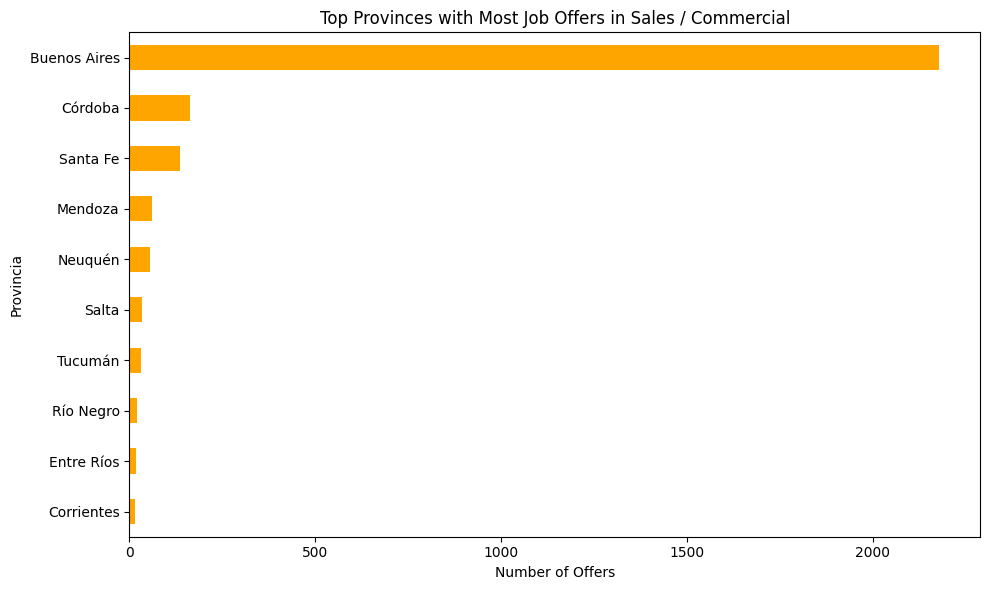

In [88]:
# Province with the most job offers in "Ventas / Comercial"
df_ventas['Provincia'].value_counts().head(10).plot(kind='barh', figsize=(10,6), color='orange', title='Top Provinces with Most Job Offers in Sales / Commercial')
plt.xlabel('Number of Offers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_provinces_sales_commercial.png')
plt.show()

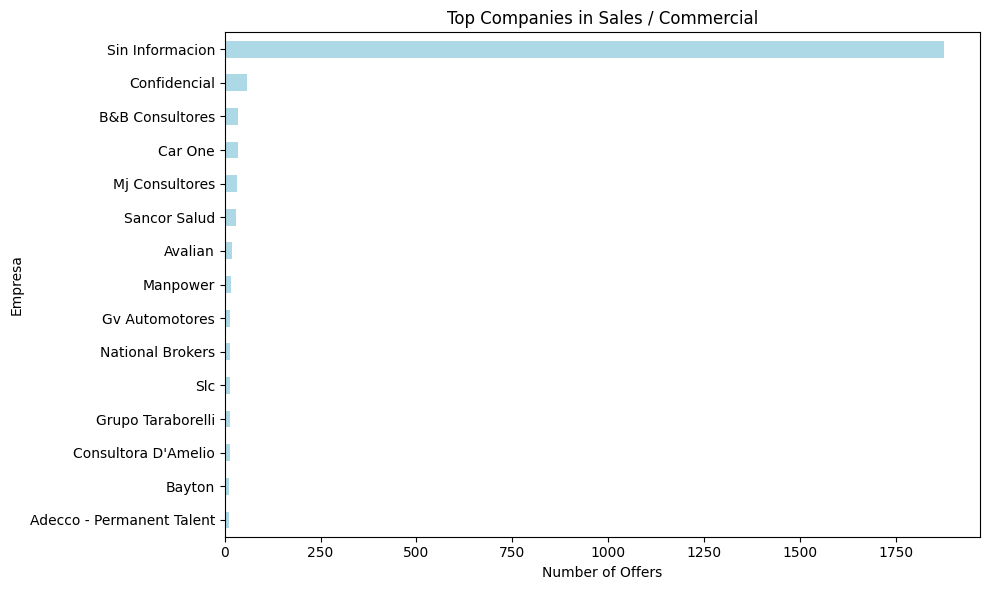

In [89]:
# Top companies in "Ventas / Comercial"
df_ventas['Empresa'].value_counts().head(15).plot(kind='barh', figsize=(10,6), color='lightblue', title='Top Companies in Sales / Commercial')
plt.xlabel('Number of Offers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_companies_sales_commercial.png')
plt.show()

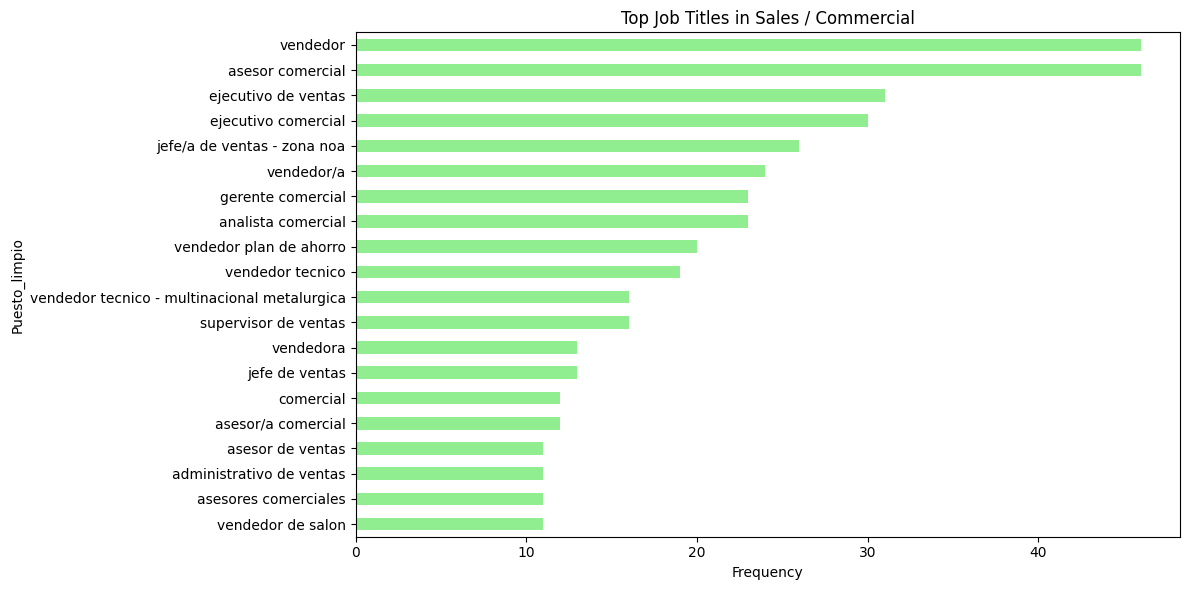

In [90]:
# Top 10 job titles in "Ventas / Comercial"
df_ventas['Puesto_limpio'].value_counts().head(20).plot(kind= 'barh', figsize= (12,6), color= 'lightgreen', title='Top Job Titles in Sales / Commercial')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_job_titles_sales_commercial.png')
plt.show()

In [91]:
pd.crosstab(df_ventas['Provincia'], df_ventas['Puesto_limpio']).sum(axis=1).sort_values(ascending=False).head(10)

Provincia
Buenos Aires    2180
Córdoba          162
Santa Fe         137
Mendoza           60
Neuquén           56
Salta             35
Tucumán           31
Río Negro         20
Entre Ríos        17
Corrientes        16
dtype: int64

- Buenos Aires is by far the leading province in terms of job offers in the Sales category, followed by Córdoba and Santa Fe.

- A large portion of companies posting Sales-related jobs do not disclose their names.

- The top 3 most requested roles in the Sales / Commercial category are:  
  1. Asesor Comercial (Commercial Advisor)  
  2. Vendedor (Salesperson)  
  3. Ejecutivo de Ventas (Sales Executive)


## 🔍 Final Thoughts and Conclusions

This labor market analysis, based on approximately 13,000 job postings in Argentina, aimed to provide insights into job demand, regional trends, and the most in-demand roles by category.

After a thorough data cleaning and classification process, the following key conclusions were reached:

- **Buenos Aires** is the province with the highest job offer volume by a wide margin, followed by Córdoba and Santa Fe. However, it's worth noting that data may be biased due to a higher user base in Buenos Aires on the analyzed platform.
- **"Sales / Commercial"** emerged as the category with the most job postings across nearly all provinces, reflecting a strong demand in commercial roles nationwide.
- A significant portion of companies do **not disclose their names** in job postings, which limits employer-specific insights.
- The **top 3 most in-demand positions** in the Sales / Commercial category are:  
  1. Asesor Comercial (Commercial Advisor)  
  2. Vendedor (Salesperson)  
  3. Ejecutivo de Ventas (Sales Executive)

Due to data inconsistency and noise in job titles, the "IT / Technology" category was not analyzed in depth. This highlights the need for more robust natural language processing tools in future analyses.

---

## ⚠️ Limitations

- The dataset included many inconsistent job titles, requiring manual and rule-based classification that may not perfectly reflect the real job categories.
- Some provinces had very limited data, making it hard to generalize conclusions on a national level.
- Employer names were often replaced with “Updated X hours ago” type strings, limiting company-specific analysis.

---

## 📚 Learnings and Next Steps

- This project provided hands-on experience in **real-world data cleaning**, **categorization**, **visualization**, and **insight extraction**.
- For future projects, it would be interesting to explore **natural language processing (NLP)** techniques to better classify job roles based on textual patterns or descriptions.
- The next iteration could also use **machine learning** to classify job types with higher accuracy.

Despite its challenges, this project offers a strong base for understanding job market trends and can be further expanded with advanced tools or refined data sources.
